# Supervised Learning with scikit-learn

Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this course, you'll learn how to use Python to perform supervised learning, an essential component of machine learning. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

## Chapters

* a. Classification
* b. Regression
* c. Fine-tuning your model
* d. Preprocessing and pipelines


#### Packages

In [1]:
# Packages
import pandas as pd # Import Pandas: a library for tabular data
import numpy as np # Import NumPy: a library for numerical operations

#Import plotting libraries: matplotlib and seaborn
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot') #Set ggplot for graphs

#Import request library for downloand the data
import requests

%matplotlib inline

In [9]:
#In case that you dont have the folder, run this.
# Python program to explain os.mkdir() method  
    
# importing os module  
import os 
  
# Directory 
directory = "datasets"
  
# Parent Directory path 
parent_dir = "."
  
# Path 
path = os.path.join(parent_dir, directory) 
  
# Create the directory 
# 'datasets' in 
# 'current directory' 
os.mkdir(path) 
print("Directory '%s' created" %directory) 
  

Directory 'datasets' created


In [3]:
cd ./datasets

[WinError 2] El sistema no puede encontrar el archivo especificado: './datasets'
C:\Users\DELL USER\GithubProjects\DataScienceProjects\Machine Learning with Sklearn (tutorial)\datasets


In [17]:
pwd

'C:\\Users\\DELL USER\\GithubProjects\\DataScienceProjects\\Machine Learning with Sklearn (tutorial)'

#### Obtain the datasets

* Automobile miles per gallon
* Boston housing
* Diabetes
* Gapminder
* US Congressional Voting Records (1984)
* White wine quality
* Red wine quality

In [12]:
# Automobile miles per gallon
url = 'https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
res = requests.get(url, allow_redirects=True)
with open('auto.csv','wb') as file:
    file.write(res.content)
    
# Boston housing
url = 'https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv'
res = requests.get(url, allow_redirects=True)
with open('boston.csv','wb') as file:
    file.write(res.content)
    
# Diabetes
url = 'https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv'
res = requests.get(url, allow_redirects=True)
with open('diabetes.csv','wb') as file:
    file.write(res.content)
    
# Gapminder
url = 'https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv'
res = requests.get(url, allow_redirects=True)
with open('gm_2008_region.csv.csv','wb') as file:
    file.write(res.content)
    
# US Congressional Voting Records (1984)
url = 'https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv'
res = requests.get(url, allow_redirects=True)
with open('house-votes-84.csv','wb') as file:
    file.write(res.content)
    
# White wine quality
url = 'https://assets.datacamp.com/production/repositories/628/datasets/2d9076606fb074c66420a36e06d7c7bc605459d4/white-wine.csv'
res = requests.get(url, allow_redirects=True)
with open('white-wine.csv','wb') as file:
    file.write(res.content)
    
# Red wine quality
url = 'https://assets.datacamp.com/production/repositories/628/datasets/013936d2700e2d00207ec42100d448c23692eb6f/winequality-red.csv'
res = requests.get(url, allow_redirects=True)
with open('winequality-red.csv','wb') as file:
    file.write(res.content)

In [13]:
cd .. # Change dir to the previous one 

C:\Users\DELL USER\GithubProjects\DataScienceProjects\Machine Learning with Sklearn (tutorial)


### Chapter 01 Classification

In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. And you’ll apply what you learn to a political dataset, where you classify the party affiliation of United States congressmen based on their voting records.

#### Tutorial A. Exploratory data analysis with Iris dataset

##### Abount Iris dataset

__Features__
* Petal lenght
* Pedtal witdh
* Sepal length
* Sepal lenght
* Sepal width

__Target__
* Versicolor
* Virginica
* Setosa

In [2]:
# The Irisi Dataset in scikit-learn
from sklearn import datasets

#load the dataset
iris = datasets.load_iris()

In [3]:
type(iris) #Bunch is like dictionary {key:values}

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
# Shape atribute
iris.data.shape # rawsxcolumns

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### Exploratory Data Analysis with Iris Dataset

In [8]:
X = iris.data
y = iris.target

#Convert to dataframe
df = pd.DataFrame(X, columns = iris.feature_names)

#Head of dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


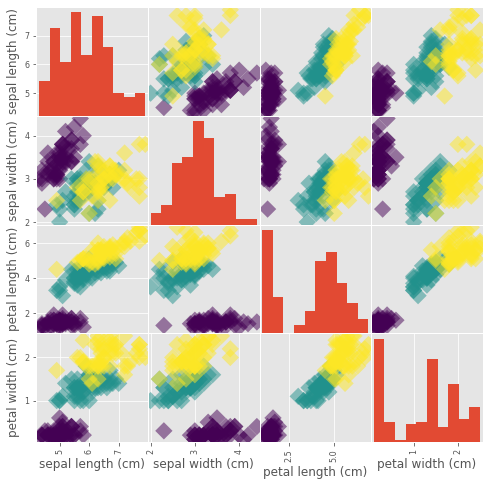

In [9]:
# Visual EDA Scatter Matrix
# c (color) : targent variable
# figsize . list ,specifies the size of our figure
#
_ = pd.plotting.scatter_matrix(df, c=y, figsize = [8,8], s=150, marker='D')


#### Practice Numerical exploratory data analysis

In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Get started with your EDA now by exploring this voting records dataset numerically. Use pandas' .head(), .info(), and .describe() methods in the IPython Shell to explore the DataFrame, and select the statement below that is not true.

  __Attribute Information__
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)


In [74]:
filename = 'house-votes-84.csv'
path = '.\\datasets\\' + filename

In [75]:
columns_names =  ['party', \
                 'handicapped-infants', \
                 'water-project-cost-sharing', \
                 'adoption-of-the-budget-resolution', \
                 'physician-fee-freeze', \
                 'el-salvador-aid', \
                'religious-groups-in-school', \
                 'anti-satellite-test-ban', \
                'aid-to-nicaraguan-contras', \
                 'mx-missile', \
                'immigration', \
                 'synfuels-corporation-cutback', \
                'education-spending', \
                'superfund-right-to-sue', \
                 'crime', \
            'duty-free-exports',\
        'export-administration-act-south-africa']


In [76]:
df = pd.read_csv(path, index_col=False ,names = columns_names)

In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df.shape

(435, 17)

In [79]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-school,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [80]:
df.replace(to_replace='?', value=np.nan , inplace=True)

In [81]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-school,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       423 non-null object
water-project-cost-sharing                387 non-null object
adoption-of-the-budget-resolution         424 non-null object
physician-fee-freeze                      424 non-null object
el-salvador-aid                           420 non-null object
religious-groups-in-school                424 non-null object
anti-satellite-test-ban                   421 non-null object
aid-to-nicaraguan-contras                 420 non-null object
mx-missile                                413 non-null object
immigration                               428 non-null object
synfuels-corporation-cutback              414 non-null object
education-spending                        404 non-null object
superfund-right-to-sue                    410 non-null object
crime                      

In [83]:
df.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-school,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


#### Practice Visual EDA


The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:

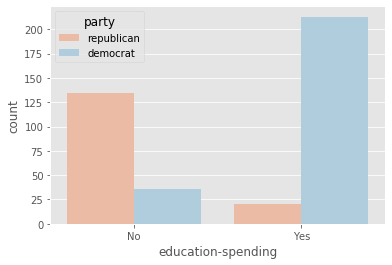

In [84]:
plt.figure()
sns.countplot(x='education-spending', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

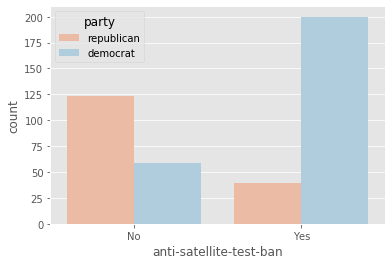

In [85]:
plt.figure()
sns.countplot(x='anti-satellite-test-ban', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

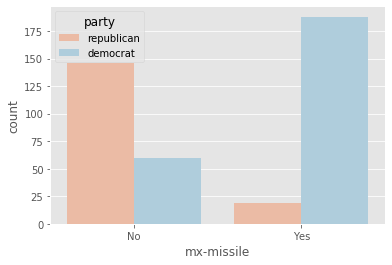

In [86]:
plt.figure()
sns.countplot(x='mx-missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

#### Tutorial B The classification challenge

##### k-Nearest Neighbors
What the KNN algorithm essentially does is create a set of decision boundaries.

IN sklearn
* .fit() method for training the model
* .preditc() Predict new data labels

In [91]:
# Using scikit-learn to fit a classifiers
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6) #Inicializate the moder with 6 neighbors
knn.fit(iris['data'],iris['target']) #iris['data'] and iris['target'] numpy arrays

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [92]:
iris['data'].shape

(150, 4)

In [93]:
iris['target'].shape

(150,)

In [94]:
# Predicting on unlabeled data
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)

print(X_new.shape)

(3, 4)


In [95]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


##### Practice k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.

* Import KNeighborsClassifier from sklearn.neighbors.
* Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
* Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
* Fit the classifier to the data using the .fit() method.

In [96]:
df_copy = df.dropna()


In [97]:
df_copy.isnull().values.any()

False

In [98]:
df_copy.head(10)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-school,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
26,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y
27,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
28,republican,y,n,n,y,y,n,y,y,y,n,n,y,y,y,n,y
29,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
30,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n


In [99]:
df_copy.iloc[:,1:17].replace(('y', 'n'), (1, 0), inplace=True)

C:\Users\DELL USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [100]:
df_copy

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-school,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1
426,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
427,republican,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1


In [101]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df_copy['party'].values
X = df_copy.drop('party', axis=1).values


# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [102]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

In [103]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred) 

In [104]:
accuracy

0.9310344827586207

##### Tutorial 03 Measuring model performance

* acc = fraction of correct predictions

REMEMBER: You could compute accuracy on data use te fit classifier
But that´s not indicative  of abilitie to generalize.

For that reason split data into train/test
Make predictions of test set

In [106]:
# Train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 21, stratify = y)

In [107]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [108]:
y_pred = knn.predict(X_test)

In [109]:
knn.score(X_test,y_test)

0.9142857142857143

#### Model complexity
Larger k = smother decision boundary = less complex model
Smaller k = more complex model = can lad to overfitting

##### Practice digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise

On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images']

* Import datasets from sklearn and matplotlib.pyplot as plt.
* Load the digits dataset using the .load_digits() method on datasets.
* Print the keys and DESCR of digits.
* Print the shape of images and data keys using the . notation.
* Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

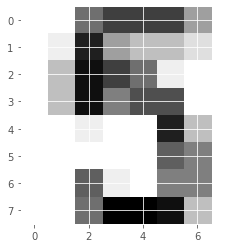

In [110]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

##### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

* Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
* Create an array for the features using digits.data and an array for the target using digits.target.
* Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
* Create a k-NN classifier with 7 neighbors and fit it to the training data.
* Compute and print the accuracy of the classifier's predictions using the .score() method.

In [113]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn =  KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


###### Overfitting and underfitting

You will now construct a complexity curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

* Inside the for loop:
* Setup a k-NN classifier with the number of neighbors equal to k.
* Fit the classifier with k neighbors to the training data.
* Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

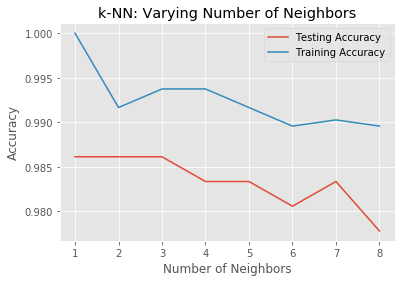

In [114]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### Chapter 02 Regression

In the previous chapter, you used image and political datasets to predict binary and multiclass outcomes. But what if your problem requires a continuous outcome? Regression is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

##### Tutorial A Predicting house prices

In [139]:
#Read the data
filename = 'boston.csv'
path = '.\\datasets\\' + filename

In [140]:
boston = pd.read_csv(path)

In [141]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [142]:
#Creating feture and targets arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [143]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [144]:
X_rooms = X[:,5]

In [145]:
X_rooms.shape

(506,)

In [146]:
type(y)

numpy.ndarray

In [147]:
type(X_rooms)

numpy.ndarray

##### Reshape

In [148]:
y_rooms = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

In [149]:
X_rooms.shape

(506, 1)

##### Plotting  house value vs number of rooms

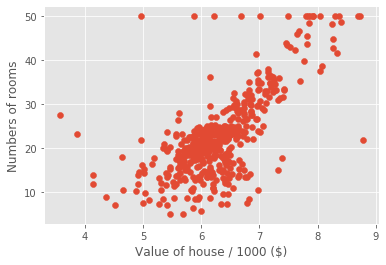

In [150]:
plt.scatter(X_rooms,y_rooms)
plt.xlabel('Value of house / 1000 ($)')
plt.ylabel('Numbers of rooms')

plt.show()

In [151]:
#### Fitting a regression model

from sklearn.linear_model import LinearRegression

# Object Linear Model
reg = LinearRegression()

# Fit in traning data
reg.fit(X_rooms, y_rooms)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# predicctions

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

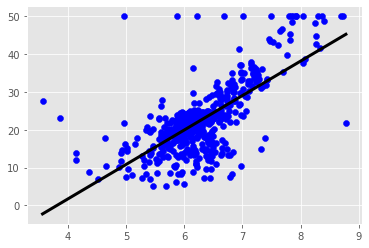

In [154]:
plt.scatter(X_rooms, y_rooms, color='blue')

plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

#### Practice Importing data for supervised learning

In this chapter, you will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [155]:
filename = 'gm_2008_region.csv.csv'
path = '.\\datasets\\' + filename

* Import numpy and pandas as their standard aliases.
* Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
* Create array X for the 'fertility' feature and array y for the 'life' target variable.
* Reshape the arrays by using the .reshape() method and passing in -1 and 1.

In [156]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv(path)

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


#### Practice Exploring the Gapminder data

As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

In [157]:
df.info

<bound method DataFrame.info of      population  fertility   HIV        CO2  BMI_male      GDP  BMI_female  \
0    34811059.0       2.73   0.1   3.328945  24.59620  12314.0    129.9049   
1    19842251.0       6.43   2.0   1.474353  22.25083   7103.0    130.1247   
2    40381860.0       2.24   0.5   4.785170  27.50170  14646.0    118.8915   
3     2975029.0       1.40   0.1   1.804106  25.35542   7383.0    132.8108   
4    21370348.0       1.96   0.1  18.016313  27.56373  41312.0    117.3755   
..          ...        ...   ...        ...       ...      ...         ...   
134   3350832.0       2.11   0.5   2.489764  26.39123  15317.0    124.2604   
135  26952719.0       2.46   0.1   4.476669  25.32054   3733.0    124.3462   
136  86589342.0       1.86   0.4   1.479347  20.91630   4085.0    121.9367   
137  13114579.0       5.88  13.6   0.148982  20.68321   3039.0    132.4493   
138  13495462.0       3.85  15.1   0.654323  22.02660   1286.0    131.9745   

     life  child_mortality     

In [158]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [159]:
df.head(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


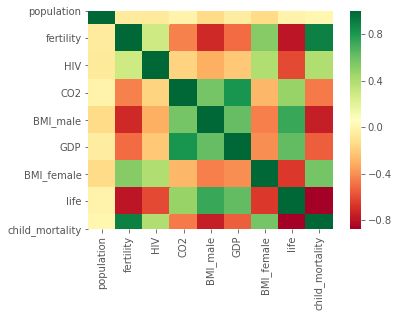

In [160]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

##### Tutorial The basics of linear regression


##### Linear Regression on all features



In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7298987360907498

#### Practice Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using sckit-learn's .score() method.

* Import LinearRegression from sklearn.linear_model.
* Create a LinearRegression regressor called reg.
* Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
* Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
* Compute and print the  score using the .score() method.
* Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

In [188]:
y = df['life'].values
X_fertility = df['fertility'].values

In [189]:
X_fertility = X_fertility.reshape(-1,1)
y = y.reshape(-1,1)

0.6192442167740035


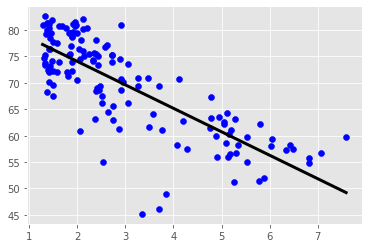

In [195]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y )

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility,y, color = 'blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


Fantastic! Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

##### Practice Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

Dont run this cell, NOT DATABASE AVAILABLE

* Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
* Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
* Compute and print the  score using the .score() method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

In [196]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [198]:
y = df['life'].values
X = df[['fertility','population','HIV','CO2','BMI_male','GDP','BMI_female','child_mortality']].values

In [199]:
X.shape

(139, 8)

In [200]:
y.shape

(139,)

In [209]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731429992
Root Mean Squared Error: 3.247601080037089


##### Tutorial Cross Validation

* Model performance is dependent on way the data is split
* Not representative of the model’s ability to generalize
* Solution: Cross-validation!

#### Cross-validation in scikit-learn

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

cv_results = cross_val_score(reg, X_fertility, y, cv=5)
print(cv_results)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [207]:
np.mean(cv_results)

0.6168819644425119

#### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses  as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
* Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

#### Gapminder

In [210]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722797866


#### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

In [211]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg =  LinearRegression()

# Perform 3-fold CV
cvscores_3 =  cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 =  cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782619912
0.8436128620126713


#### Tutorial Regularized regression

#### Why regularize

* Recall: Linear regression minimizes a loss function
* It chooses a coecient for each feature variable
* Large coecients can lead to overing
* Penalizing large coecients: Regularization

#### Ridge Regression

Loss function = OLS loss function + $\alpha* \sum \left(a_{i}\right)^{2}$ <br>

$\alpha$ is some constant (parameter) <br>

$\alpha$ control model complexity Large $\alpha$ penalizes large coeficients $a_{i}$ <br>

Very high $\alpha$ can lead to underfitting

#### Ridge Regression in scikit-learn

In [212]:
from sklearn.linear_model import Ridge

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

#Fit on training
ridge = Ridge(alpha = 0.1,  normalize = True)
ridge.fit(X_train, y_train)

#prediction
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.844246995997575

#### Lasso Regression

Loss function = OLS loss function + $\alpha* \sum \mid a_{i}\mid$ <br>

#### Lasso Regression in scikit-learn

In [213]:
from sklearn.linear_model import Lasso

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

#Fit on training
lasso = Lasso(alpha = 0.1,  normalize = True)
lasso.fit(X_train, y_train)

#prediction
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8721296169613538

##### Lasso regression for feature selection

* Can be used to select  important features  of a dataset
* Shrinks the coefficients of less important features to exactly 0

<function matplotlib.pyplot.show(*args, **kw)>

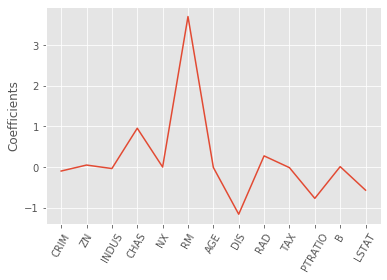

In [218]:
from sklearn.linear_model import Lasso

#Creating feture and targets arrays
X = boston.drop('MEDV', axis=1).values
X_rooms = X[:,5]

y = boston['MEDV'].values

# Create training and test sets
names = boston.drop('MEDV', axis = 1 ).columns


lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show

#### Regularization I: Lasso GADMINDES DON'T RUN
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

* Import Lasso from sklearn.linear_model.
* Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
* Fit the regressor to the data and compute the coefficients using the coef_ attribute.
* Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!

In [223]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [234]:
df = df.drop('Region', axis = 1)

In [237]:
y = df['life'].values
df_copy = df.drop('life', axis=1)


In [239]:
df_columns = df_copy.columns

In [240]:
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [241]:
y = df['life'].values
X = df_copy.values

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


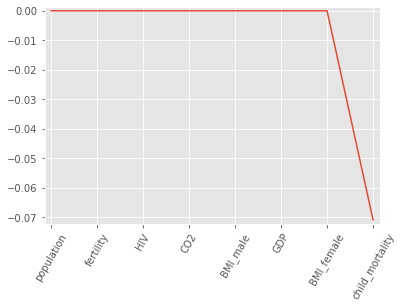

In [242]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize=True)

# Fit the regressor to the data
lasso_coef = lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso_coef.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


Great work! According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as  regularization because the regularization term is the  norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the  norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated  scores for each, using this function that we have defined for you, which plots the  score as well as standard error for each alpha:

In [243]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

* Instantiate a Ridge regressor and specify normalize=True.
* Inside the for loop:
* Specify the alpha value for the regressor to use.
* Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
* Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
* Use the display_plot() function to visualize the scores and standard deviations.


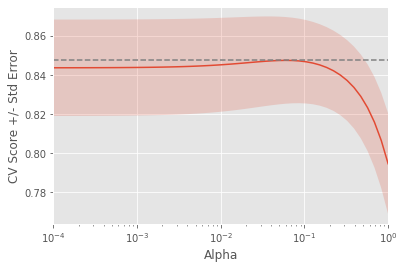

In [244]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Great work! Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!

###  Chapter 03 Fine-tuning your model

Having trained your model, your next task is to evaluate its performance. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. Next, learn to optimize your classification and regression models using hyperparameter tuning.

#### Tutorial How good is your model?

In [245]:
#Confusion matrix in sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Democrats vs Republicans
knn = KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Pratice Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [246]:
filename = 'diabetes.csv'
path = '.\\datasets\\' + filename

In [247]:
diabetes = pd.read_csv(path)

In [249]:
diabetes.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [254]:
diabetes.isna().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

* Import classification_report and confusion_matrix from sklearn.metrics.
* Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
* Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
* Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

In [259]:
y_diabetes = diabetes['diabetes'].values
X_diabetes = diabetes.drop('diabetes', axis = 1).values 

In [261]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes, test_size = 0.4, random_state = 42)

# Instantiate a k-NN classifier: knn
knn =  KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



Excellent work! By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

#### Tutorial Logistic regression and the ROC curve

#### Logistic regression in scikit-learn

In [264]:
filename = 'house-votes-84.csv'
path = '.\\datasets\\' + filename

columns_names =  ['party', \
                 'handicapped-infants', \
                 'water-project-cost-sharing', \
                 'adoption-of-the-budget-resolution', \
                 'physician-fee-freeze', \
                 'el-salvador-aid', \
                'religious-groups-in-school', \
                 'anti-satellite-test-ban', \
                'aid-to-nicaraguan-contras', \
                 'mx-missile', \
                'immigration', \
                 'synfuels-corporation-cutback', \
                'education-spending', \
                'superfund-right-to-sue', \
                 'crime', \
            'duty-free-exports',\
        'export-administration-act-south-africa']


In [265]:
df = pd.read_csv(path, index_col=False ,names = columns_names)

df.reset_index(drop=True, inplace=True)

df.replace(to_replace='?', value=np.nan , inplace=True)

df_copy = df.dropna()

df_copy.iloc[:,1:17].replace(('y', 'n'), (1, 0), inplace=True)

# Create arrays for the features and the response variable
y_elections = df_copy['party'].values
X_elections = df_copy.drop('party', axis=1).values

C:\Users\DELL USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [276]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_elections)

LabelEncoder()

In [281]:
y_elec = le.transform(y_elections)

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_elections,y_elec, test_size = 0.4, random_state = 42)

logreg.fit(X_train, y_train)
ypred = logreg.predict(X_test)

C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [283]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

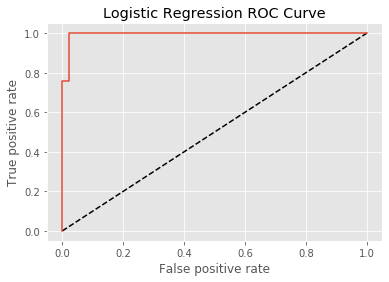

In [284]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [285]:
logreg.predict_proba(X_test)[:,1]

array([0.0253258 , 0.06962091, 0.95138382, 0.8175463 , 0.97324568,
       0.9450947 , 0.96723158, 0.07257652, 0.93514904, 0.95138382,
       0.79762645, 0.0253258 , 0.03089107, 0.78749681, 0.03089107,
       0.18832129, 0.9450947 , 0.78987845, 0.00728778, 0.63779121,
       0.0031563 , 0.03229137, 0.0147579 , 0.01338585, 0.95138382,
       0.02374156, 0.00810097, 0.87915149, 0.01093869, 0.87312815,
       0.94075455, 0.95498256, 0.97537838, 0.02915879, 0.00829134,
       0.01332446, 0.9752682 , 0.03089107, 0.0602129 , 0.9752682 ,
       0.0123611 , 0.62458001, 0.9450947 , 0.04567399, 0.00789531,
       0.96621053, 0.00833933, 0.94075455, 0.84614087, 0.8966975 ,
       0.05116861, 0.95748211, 0.01024496, 0.97324568, 0.02125434,
       0.01909679, 0.95498256, 0.96723158, 0.05007096, 0.87111153,
       0.01442791, 0.0156402 , 0.84727121, 0.03258584, 0.05151066,
       0.92606461, 0.04592828, 0.85488539, 0.00585134, 0.00553755,
       0.05593893, 0.83987741, 0.02194166, 0.67785324, 0.78864

#### Building a logistic regression model
Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y have been pre-loaded, and train_test_split has been imported for you from sklearn.model_selection.

* Import:
*LogisticRegression from sklearn.linear_model.
* confusion_matrix and classification_report from sklearn.metrics.
* Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
* Instantiate a LogisticRegression classifier called logreg.
* Fit the classifier to the training data and predict the labels of the test set.
* Compute and print the confusion matrix and classification report. This has been done for you, so hit 'Submit Answer' to see how logistic regression compares to k-NN!

In [289]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Plotting an ROC curve
Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

* Import roc_curve from sklearn.metrics.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
* Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

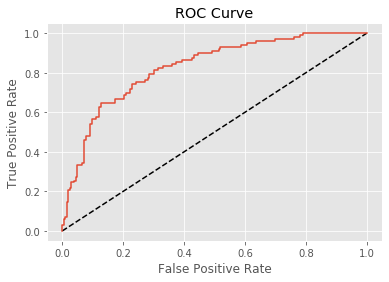

In [291]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig

#### Tutorial Area under the ROC curve


* Larger area under the ROC curve = better model

#### AUC in scikit-learn

In [296]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_elections,y_elec, test_size = 0.4, random_state = 42)

logreg.fit(X_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9949121184088807

In [298]:
# AUC using cross_validation

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(logreg, X_elections,y_elec, cv=5, scoring = 'roc_auc')

print(cv_score)

C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

[0.99636364 0.98727273 1.         0.99619048 0.96230159]


### AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.

* Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
* Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.

In [301]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc =  cross_val_score(logreg, X_diabetes,y_diabetes, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80759259 0.81944444 0.86622642 0.85056604]


C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

#### Tutorial Hyperparameter tuning


* Try a bunch of dierent hyperparameter values
* Fit all of them separately
* See how well each performs
* Choose the best performing one
* It is essential to use cross-validation

#### Grid search cross validation

In [302]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_elections,y_elec)
knn_cv.best_params_


C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 4}

In [303]:
knn_cv.best_score_

0.9224137931034483

#### Exercise Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: .  controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large  can lead to an overfit model, while a small  can lead to an underfit model.

The hyperparameter space for  has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal  in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

In [ ]:
X_diabetes,y_diabetes

* Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
* Setup the hyperparameter grid by using c_space as the grid of values to tune  over.
* Instantiate a logistic regression classifier called logreg.
* Use GridSearchCV with 5-fold cross-validation to tune :
* Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
* Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
* Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

In [305]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_diabetes,y_diabetes)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

#### Hyperparameter tuning with RandomizedSearchCV